In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplot inline

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
UsageError: Line magic function `%matplot` not found.


In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = data[['Annual Income (k$)','Spending Score (1-100)']].values

# Visualize Clients Income and Spending Score

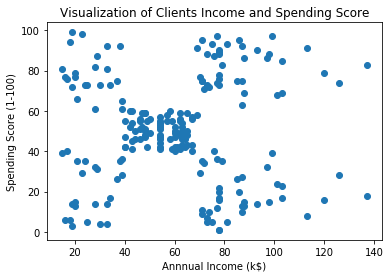

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.title('Visualization of Clients Income and Spending Score')
plt.xlabel('Annnual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Find the optimal number of clusters

### Use Dendrogram to find optimal number of clusters

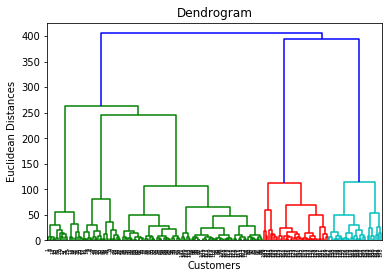

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Train and predict using KMeans with 5 clusters

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc =  AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [10]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

# Visualize the clusters

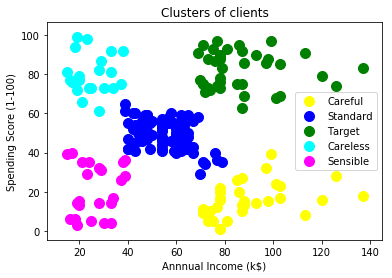

In [11]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='yellow', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c="blue", label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c="green", label='Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c="cyan", label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c="magenta", label='Sensible')
plt.title('Clusters of clients')
plt.xlabel('Annnual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()